1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [8]:
import numpy as np
import math
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1204533)


Number bins: 18

bins: [-3.3041821  -2.95887229 -2.61356247 -2.26825266 -1.92294285 -1.57763304
 -1.23232322 -0.88701341 -0.5417036  -0.19639379  0.14891603  0.49422584
  0.83953565  1.18484547  1.53015528  1.87546509  2.2207749   2.56608472
  2.91139453]
[0.34530981 0.34530981 0.34530981 0.34530981 0.34530981 0.34530981
 0.34530981 0.34530981 0.34530981 0.34530981 0.34530981 0.34530981
 0.34530981 0.34530981 0.34530981 0.34530981 0.34530981 0.34530981]
[0.0057919  0.0173757  0.0231676  0.0521271  0.0405433  0.1042542
 0.23167601 0.24905171 0.39384922 0.39964112 0.46335202 0.26642741
 0.20271651 0.23167601 0.0868785  0.0637109  0.0463352  0.0173757 ]
[0.34530981 0.34530981 0.34530981 0.34530981 0.34530981 0.34530981
 0.34530981 0.34530981 0.34530981 0.34530981 0.34530981 0.34530981
 0.34530981 0.34530981 0.34530981 0.34530981 0.34530981 0.34530981]

Area of histogram: 1.0

Area of KDE: 8291.666666666668
1.0


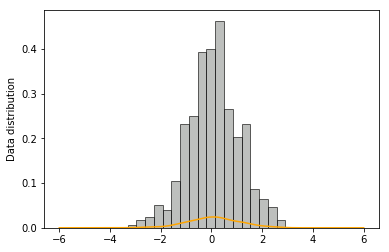

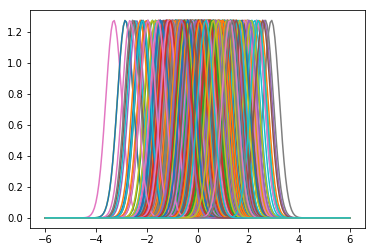

In [24]:
##### Freedman-Diaconis rule to compute a meaningful number of bins
def freeDi(x):
    N = len(x)
    bin_width = 2 * sp.stats.iqr(x)*(N)**(-1/3)
    max_ = np.max(x)
    min_ = np.min(x)
    num_bins = int( ( max_- min_ ) / ( bin_width ) )
    return num_bins

N = 500
mu = 0
sigma = 1
x =  sigma * np.random.randn(N) + mu
n_bins = freeDi(x)
print('\nNumber bins:', n_bins )
fig, axs = plt.subplots()
hist, bins, _ = axs.hist(x, bins=n_bins, color='xkcd:gray', edgecolor='black', alpha=0.6, density=True )
print('\nbins:', bins)
axs.set_ylabel('Data distribution')
#axs.yaxis.set_ticks(np.arange(0,130,10))
widths = bins[1:] - bins[:-1]
bins_center = ( bins[:-1] + bins[1:] ) / 2
#err = 
print(widths)


std_dev = 1.06 * x.std() * x.size**(-1/5)
lin = np.linspace(mu-6,mu+6,200)
f,ax = plt.subplots()
gauss = np.zeros( ( len(x), len(lin) ) )

for (i,el) in enumerate(x):
    mean = el
    g = sp.stats.norm(mean,std_dev)
    gauss[i,:] = g.pdf(lin)
    ax.plot( lin,g.pdf(lin) )

#print(gauss)
density = np.sum( gauss, axis=0 )

#Normalization
print(hist)
print(widths)
int_hist = np.sum(hist*widths)
print('\nArea of histogram:', int_hist)

int_KDE = sp.integrate.trapz(density)
print('\nArea of KDE:', int_KDE)

scale_factor = ( int_hist/int_KDE )

print(sp.integrate.trapz(scale_factor*density))


#std = math.sqrt(np.mean(  diff, density )
lin = np.linspace( mu-6, mu+6, 200 )
axs.plot( lin, scale_factor*density, color='orange' )
#sp.integrate.trapz(density_norm)

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [ ]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot